In [261]:
import numpy as np
import pandas as pd

In [262]:
df = pd.read_csv("D:\MIT ADT\Third Year - Sem 2\ML LAB\Assign 4\Company_Data.csv")

In [263]:
df["Urban"].unique()

array(['Yes', 'No'], dtype=object)

In [264]:
df["Urban"] = df['Urban'].replace("Yes", 1)
df["Urban"] = df['Urban'].replace("No", 0)

In [265]:
df["US"] = df['US'].replace("Yes", 1)
df["US"] = df['US'].replace("No", 0)

In [266]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [267]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

df["ShelveLoc"] = lbl_enc.fit_transform(df["ShelveLoc"])

In [268]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


<h1>Removing Outliers</h1>

• A data point which is significantly far from other data points
• Inter-quartile Range (IQR)
• IQR = Q3-Q1
• Lower Boundary = QI - 1.5 • IQR
• Upper Boundary = 03 + 1.5 • IOR
• Boxplot

In [269]:
import matplotlib.pyplot as plt 

In [270]:
df.shape

(400, 11)

In [271]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


<h3>Boxplot</h3>

In [272]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

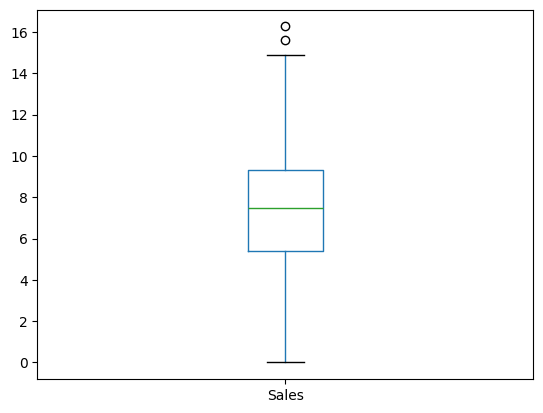

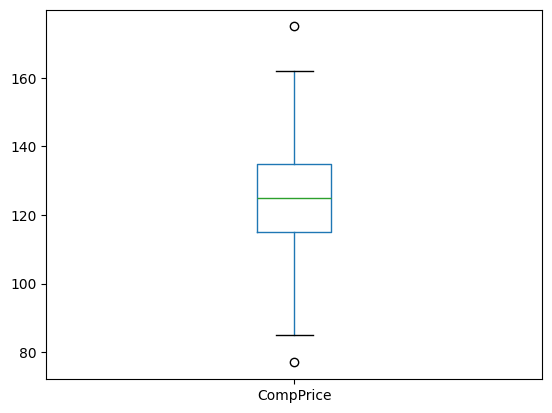

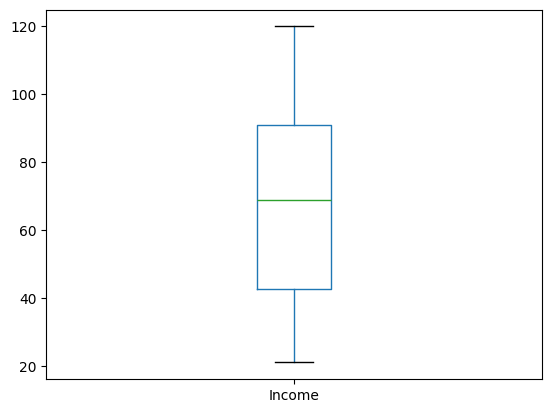

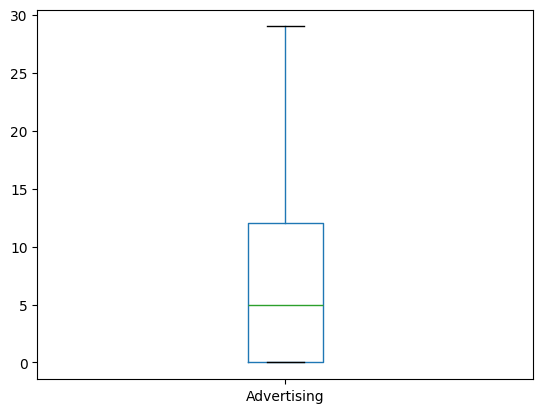

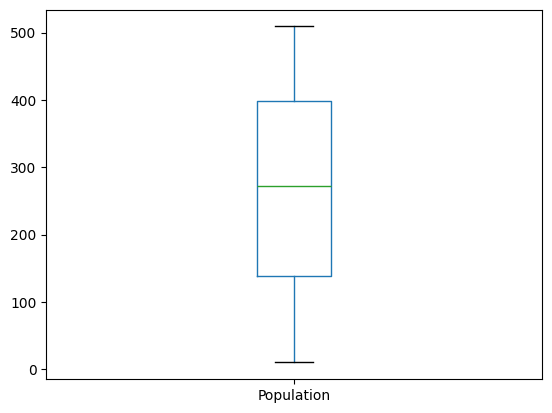

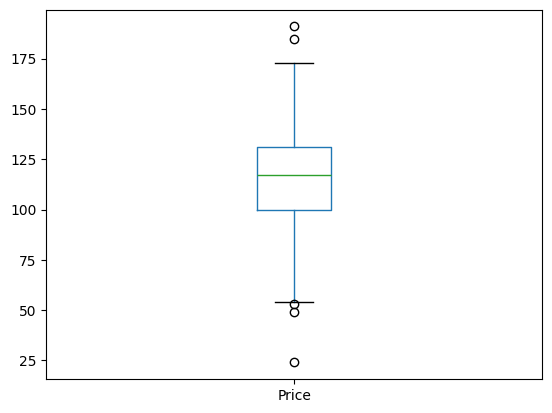

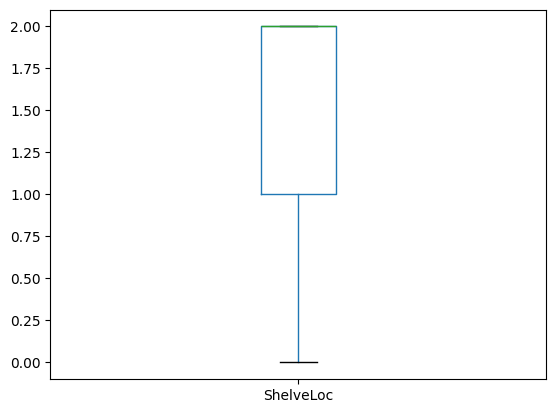

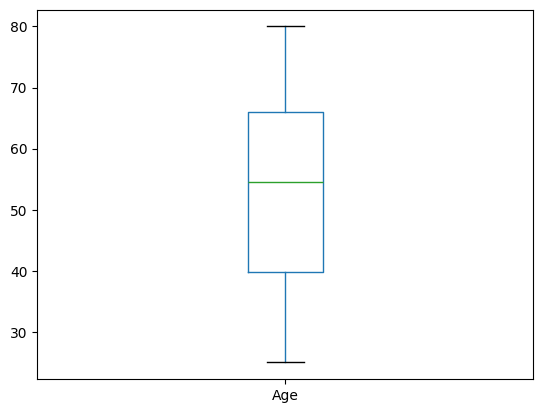

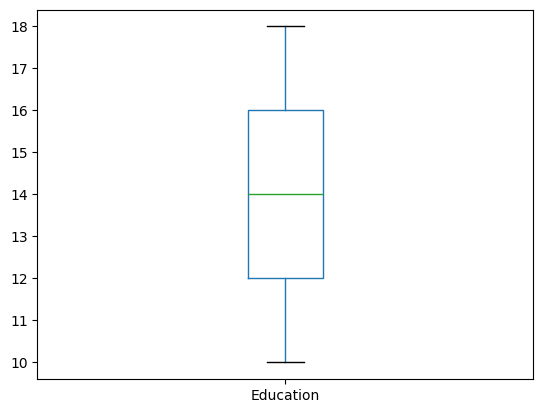

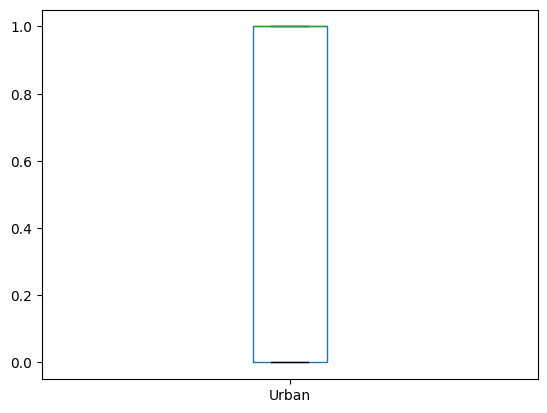

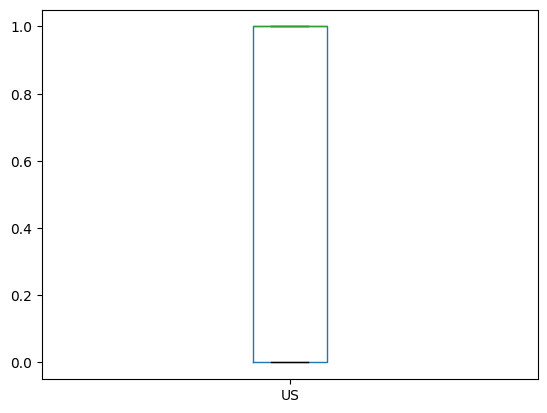

In [273]:
for col in df.columns.values:
    plot_boxplot(df, col)#checking if outliers exist for al lthe features/ colums in the dataset


<h2>removing outliers</h2>

<h4># define a function catted "outliers" which returns a List of index of outliers
1
# IQR - Q3-Q1
# +/- 1.5*IQR</h4>

In [274]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Extract the indexes of outliers
    outlier_indexes = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return outlier_indexes
       

In [275]:
#create an emptyl ist to store the output indices from multiple columns

In [276]:
df.columns.values

array(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype=object)

In [277]:
index_list = []
# col_list = df.columns.values
# print(col_list)""" Advertising    0.366311Education      0.056379Urban          0.035967Sales          0.028634Income         0.002542 
for feature in  ["Advertising", "Education", "Urban", "Sales", "Income"]:
    index_list.extend(outliers(df, feature))
    #to save the output in the same list we use extend fucntion from python

In [278]:
index_list

[316, 376]

In [279]:
def remove(df, ls): 
    #need to process the index list as it is not sorted or unique
    ls = sorted(set(ls))
    df = df.drop(ls)
    
    return df
    

In [280]:
df_cleaned = remove(df, index_list)

In [281]:
df_cleaned.shape

(398, 11)

In [282]:
df_cleaned.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [283]:
X = df_cleaned.drop("US", axis=1)
y = df_cleaned["US"]

In [284]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X,y)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Advertising    0.372670
Urban          0.038319
Sales          0.037169
Age            0.024909
Price          0.018407
Income         0.008721
ShelveLoc      0.001488
CompPrice      0.000000
Population     0.000000
Education      0.000000
dtype: float64

In [285]:
X = X.drop(["Urban", "CompPrice", "Population","ShelveLoc", "Education"], axis=1)

In [286]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

print(Xtrain.shape, Xtest.shape)
print(ytrain.shape, ytest.shape)

(318, 5) (80, 5)
(318,) (80,)


In [287]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain = scaler.fit_transform(Xtrain)

Xtest = scaler.transform(Xtest)

In [288]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb

GaussianNB()

In [289]:
y_pred = gnb.fit(Xtrain, ytrain).predict(Xtest)
print("Number of mislabeled points out of a total %d points : %d" % (Xtest.shape[0], (ytest != y_pred).sum()))

Number of mislabeled points out of a total 80 points : 11


In [290]:
gnb.score(Xtrain, ytrain)

0.8805031446540881

In [291]:
gnb.score(Xtest, ytest)

0.8625